# IMPORTS & FUNCTIONS

### Import all necessary libraries

In [7]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import re
from datetime import datetime
import urllib
import matplotlib.pyplot as plt

### Get information about the film

In [8]:
def get_info(url):
        film_info = {}
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        
        for tag in soup.find_all('sup'):
            tag.decompose()
        
        info_box = soup.select('.infobox.vevent tr')
        title = (info_box[0].find(class_='infobox-above')).text
        film_info['Title'] = title

        for info in info_box:
            box_label = info.find(class_='infobox-label')
            box_data = info.find(class_='infobox-data')
            if box_label:
                film_info[box_label.text] = str(clean_data(box_data.text))

        return film_info


### Save data to json file

In [9]:
def save_to_json(data, name):
    with open(name, 'w') as f:
      json.dump(data, f, ensure_ascii=False)

### Clean data from extra symnols

In [10]:
def clean_data(data):
    data = data.replace(' \n',': ')
    data = data.replace('\n\n','; ')
    data = data.strip()
    data = data.replace('\n',', ')
    data = data.replace('\xa0',' ')
    return data


### Convert string with amount of money into a number in dollars

In [11]:
# $960,000 (worldwide rentals)
# $4,150,000 (US/ Canada rentals)[1]
# $76.4–$83.3 million (United States and Canada)
#$1.066 billion[2]
#$35 Million[3]

def convert_into_number(money):
    try:
        money = str(money)
        money = money.replace(',  ', ' ')
        money = money.replace(',', '')
        money = money.replace('–','-')
        money = money.replace('—','-')
        money = money.replace(' to ','-')
        money = money.replace('Million', 'million')

        money_million = re.search(r'\$\d+\.?\d*\-?\$?\d*\.?\d*\s[m,b]illion', money)
        money_no_million = re.search(r'\$\d+\.?\d*\-?\d*\.?\d*', money)
        

        if money_million:
            multiplier = 1000000
            delimeter = 'm'
            
            if 'billion' in money_million[0]:
                multiplier = 1000000000
                delimeter = 'b'
            
            money_million = money_million[0].split(delimeter)[0]
            money_million = money_million.strip()
            money_million = money_million.split('-')[0]
            money_million = money_million.replace('$', '')
            return int(float(money_million) * multiplier)
        else:
            money_no_million = money_no_million[0].replace('$', '')
            return money_no_million
    except:
        pass
            
    

### Convert strings into date format

In [12]:
def convert_into_date(date):
    date = str(date).split('(')[0]
    date = date.strip()
    print(date)
    fmts = ["%B %d, %Y", "%d %B %Y"]
    for fmt in fmts:
        try:
            return datetime.strptime(date, fmt).date()
        except:
            pass
    

### Get minutes from time strings

In [13]:
def get_minutes(time):
    time = str(time)
    time = re.search(r'\d*', time)[0]
    return time

### Get IMDB rating

In [14]:
def get_imdb(title):
    try:
        url = 'http://www.omdbapi.com/?'
        parameters = {'apikey': 'eb783147', 't': title}
        parameters_encoded = urllib.parse.urlencode(parameters)
        url = url + parameters_encoded
        data = requests.get(url).json()
        return data['imdbRating']
    except:
        pass

# Making a list with information about all films

### Make a list of links of all films by Disney

In [19]:
url = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
films = soup.select('.wikitable.sortable i a')
films_list = []
for film in films:
    films_list.append(film['href'])

### Add information about the films to the list

In [25]:
films_info = []

try:
    for link in films_list:
        url = "https://en.wikipedia.org" + link
        films_info.append(get_info(url))
        print(url)
except:
    pass
    
    

https://en.wikipedia.org/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)
https://en.wikipedia.org/wiki/Pinocchio_(1940_film)
https://en.wikipedia.org/wiki/Fantasia_(1940_film)
https://en.wikipedia.org/wiki/The_Reluctant_Dragon_(1941_film)
https://en.wikipedia.org/wiki/Dumbo
https://en.wikipedia.org/wiki/Bambi
https://en.wikipedia.org/wiki/Saludos_Amigos
https://en.wikipedia.org/wiki/Victory_Through_Air_Power_(film)
https://en.wikipedia.org/wiki/The_Three_Caballeros
https://en.wikipedia.org/wiki/Make_Mine_Music
https://en.wikipedia.org/wiki/Song_of_the_South
https://en.wikipedia.org/wiki/Fun_and_Fancy_Free
https://en.wikipedia.org/wiki/Melody_Time
https://en.wikipedia.org/wiki/So_Dear_to_My_Heart
https://en.wikipedia.org/wiki/The_Adventures_of_Ichabod_and_Mr._Toad
https://en.wikipedia.org/wiki/Cinderella_(1950_film)
https://en.wikipedia.org/wiki/Treasure_Island_(1950_film)
https://en.wikipedia.org/wiki/Alice_in_Wonderland_(1951_film)
https://en.wikipedia.org/wiki/The_Story_of_Robin_Hoo

https://en.wikipedia.org/wiki/The_Fox_and_the_Hound
https://en.wikipedia.org/wiki/Condorman
https://en.wikipedia.org/wiki/Night_Crossing
https://en.wikipedia.org/wiki/Tron
https://en.wikipedia.org/wiki/Tex_(film)
https://en.wikipedia.org/wiki/Trenchcoat_(film)
https://en.wikipedia.org/wiki/Something_Wicked_This_Way_Comes_(film)
https://en.wikipedia.org/wiki/Never_Cry_Wolf_(film)
https://en.wikipedia.org/wiki/Return_to_Oz
https://en.wikipedia.org/wiki/The_Black_Cauldron_(film)
https://en.wikipedia.org/wiki/The_Journey_of_Natty_Gann
https://en.wikipedia.org/wiki/One_Magic_Christmas
https://en.wikipedia.org/wiki/The_Great_Mouse_Detective
https://en.wikipedia.org/wiki/Flight_of_the_Navigator
https://en.wikipedia.org/wiki/Benji_the_Hunted
https://en.wikipedia.org/wiki/The_Man_from_Snowy_River_II
https://en.wikipedia.org/wiki/Oliver_%26_Company
https://en.wikipedia.org/wiki/Honey,_I_Shrunk_the_Kids
https://en.wikipedia.org/wiki/Cheetah_(1989_film)
https://en.wikipedia.org/wiki/The_Little_Mer

https://en.wikipedia.org/wiki/Lilo_%26_Stitch_2:_Stitch_Has_a_Glitch
https://en.wikipedia.org/wiki/Pooh%27s_Heffalump_Halloween_Movie
https://en.wikipedia.org/wiki/The_Greatest_Game_Ever_Played
https://en.wikipedia.org/wiki/Chicken_Little_(2005_film)
https://en.wikipedia.org/wiki/The_Chronicles_of_Narnia:_The_Lion,_the_Witch_and_the_Wardrobe
https://en.wikipedia.org/wiki/Kronk%27s_New_Groove
https://en.wikipedia.org/wiki/Glory_Road_(film)
https://en.wikipedia.org/wiki/Roving_Mars
https://en.wikipedia.org/wiki/Bambi_II
https://en.wikipedia.org/wiki/Eight_Below
https://en.wikipedia.org/wiki/The_Shaggy_Dog_(2006_film)
https://en.wikipedia.org/wiki/The_Wild
https://en.wikipedia.org/wiki/Cars_(film)
https://en.wikipedia.org/wiki/Leroy_and_Stitch
https://en.wikipedia.org/wiki/Pirates_of_the_Caribbean:_Dead_Man%27s_Chest
https://en.wikipedia.org/wiki/Invincible_(2006_film)
https://en.wikipedia.org/wiki/Brother_Bear_2
https://en.wikipedia.org/wiki/The_Nightmare_Before_Christmas
https://en.wiki

https://en.wikipedia.org/wiki/Frozen_II
https://en.wikipedia.org/wiki/Togo_(film)
https://en.wikipedia.org/wiki/Timmy_Failure:_Mistakes_Were_Made
https://en.wikipedia.org/wiki/Onward_(film)
https://en.wikipedia.org/wiki/Stargirl_(film)
https://en.wikipedia.org/wiki/Dolphin_Reef_(film)
https://en.wikipedia.org/wiki/Elephant_(2020_film)
https://en.wikipedia.org/wiki/Artemis_Fowl_(film)
https://en.wikipedia.org/wiki/Hamilton_(2020_film)
https://en.wikipedia.org/wiki/Black_Is_King
https://en.wikipedia.org/wiki/Magic_Camp_(film)
https://en.wikipedia.org/wiki/The_One_and_Only_Ivan_(film)
https://en.wikipedia.org/wiki/Mulan_(2020_film)
https://en.wikipedia.org/wiki/Godmothered
https://en.wikipedia.org/wiki/Safety_(2020_film)
https://en.wikipedia.org/wiki/Soul_(2020_film)
https://en.wikipedia.org/wiki/The_Last_Warrior:_Root_of_Evil
https://en.wikipedia.org/wiki/Flora_%26_Ulysses_(film)
https://en.wikipedia.org/wiki/Raya_and_the_Last_Dragon
https://en.wikipedia.org/wiki/Cruella_(film)
https://e

In [26]:
save_to_json(films_info, 'data.json')

# CLEAN DATA

In [15]:
df = pd.read_json('data.json')

In [16]:
df.columns

Index(['Title', 'Directed by', 'Written by', 'Based on', 'Produced by',
       'Starring', 'Music by', 'Productioncompany', 'Distributed by',
       'Release dates', 'Running time', 'Country', 'Language', 'Budget',
       'Box office', 'Story by', 'Narrated by', 'Cinematography',
       'Release date', 'Edited by', 'Languages', 'Screenplay by', 'Released',
       'Label', 'Countries', 'Genre', 'Length', 'Producer', 'Color process',
       'Recorded', 'Created by', 'Country of origin', 'No. of seasons',
       'No. of episodes', 'Executive producers', 'Production company',
       'Original network', 'Picture format', 'Audio format',
       'Original release', 'Related shows', 'Productioncompanies', 'Japanese',
       'Hepburn', 'Adaptation by', 'Animation by', 'Traditional', 'Simplified',
       'Compiler', 'Songwriter(s)', 'Producer(s)', 'Original title',
       'Suggested by', 'Layouts by', 'Studio', 'Director', 'Original language',
       'Producers', 'Editor', 'Production companies'

In [17]:
df = df.drop(columns = ['Edited by', 'Languages', 'Screenplay by', 'Released',
       'Label', 'Countries', 'Genre', 'Length', 'Producer', 'Color process',
       'Recorded', 'Created by', 'Country of origin', 'No. of seasons',
       'No. of episodes', 'Executive producers', 'Production company',
       'Original network', 'Picture format', 'Audio format',
       'Original release', 'Related shows', 'Productioncompanies', 'Japanese',
       'Hepburn', 'Adaptation by', 'Animation by', 'Traditional', 'Simplified',
       'Compiler', 'Songwriter(s)', 'Producer(s)', 'Original title',
       'Suggested by', 'Layouts by', 'Studio', 'Director', 'Original language',
       'Producers', 'Editor', 'Production companies', 'Distributor'])

In [18]:
df['Box office'] = df['Box office'].apply(convert_into_number)

In [19]:
df['Budget'] = df['Budget'].apply(convert_into_number)

In [20]:
df['Release dates'] = df['Release dates'].apply(convert_into_date)

December 21, 1937
February 7, 1940
nan
nan
October 23, 1941
August 9, 1942
August 24, 1942
nan
December 21, 1944
April 20, 1946
November 12, 1946
nan
nan
November 29, 1948
nan
February 15, 1950
June 22, 1950
July 26, 1951
13 March 1952
nan
nan
nan
26 October 1953
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
June 24, 1959
nan
nan
nan
nan
nan
nan
June 1960
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
November 14, 1962
nan
nan
nan
nan
nan
December 18, 1963
nan
nan
11 December 1963
nan
August 27, 1964
nan
nan
nan
nan
February 4, 1966
June 25, 1966
nan
nan
nan
nan
nan
nan
nan
June 23, 1967
nan
nan
nan
nan
December 24, 1968
nan
nan
nan
nan
nan
nan
December 11, 1970
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
December 17, 1976
May 26, 1976
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
July 19, 1979
December 18, 1979
nan
April 17, 1980
nan
nan
December 6, 1980
nan
nan
nan
nan
nan
nan
nan
nan

In [21]:
df['Running time'] = df['Running time'].apply(get_minutes)

In [22]:
df.columns

Index(['Title', 'Directed by', 'Written by', 'Based on', 'Produced by',
       'Starring', 'Music by', 'Productioncompany', 'Distributed by',
       'Release dates', 'Running time', 'Country', 'Language', 'Budget',
       'Box office', 'Story by', 'Narrated by', 'Cinematography',
       'Release date'],
      dtype='object')

In [23]:
df.rename(columns = {'Box office': 'Box office $', 'Productioncompany': 'Production company', 'Budget': 'Budget $', 'Running time': 'Running time (mins)'}, inplace = True)

In [24]:
df['IMDB'] = df['Title'].apply(get_imdb)

In [25]:
df.head()

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
0,Snow White and the Seven Dwarfs,Supervising Director: David Hand; Sequence Dir...,"Ted Sears, Richard Creedon, Otto Englander, Di...",Snow Whiteby The Brothers Grimm,Walt Disney,"Adriana Caselotti, Lucille La Verne, Harry Sto...","Frank Churchill, Paul Smith, Leigh Harline",Walt Disney Productions,RKO Radio Pictures,1937-12-21,83,United States,English,1490000,418000000,NaN,NaN,NaN,NaN,7.6
1,Pinocchio,"Supervising Directors, Ben Sharpsteen, Hamilto...",NaN,The Adventures of Pinocchioby Carlo Collodi,Walt Disney,"Cliff Edwards, Dickie Jones, Christian Rub, Wa...",Leigh HarlinePaul J. Smith,Walt Disney Productions,RKO Radio Pictures,1940-02-07,88,United States,English,2600000,164000000,Ted SearsOtto EnglanderWebb SmithWilliam Cottr...,NaN,NaN,NaN,7.5
2,Fantasia,"Samuel Armstrong, James Algar, Bill Roberts, P...",NaN,NaN,"Walt Disney, Ben Sharpsteen","Leopold Stokowski, Deems Taylor",See program,Walt Disney Productions,RKO Radio Pictures,None,126,United States,English,2280000,76400000,"Joe Grant, Dick Huemer",Deems Taylor,James Wong Howe,"November 13, 1940 (1940-11-13)",7.7
3,The Reluctant Dragon,Alfred Werker (live action)Hamilton Luske (ani...,Live-action:Ted SearsAl PerkinsLarry ClemmonsB...,NaN,Walt Disney,Robert BenchleyFrances GiffordBuddy PepperNana...,Frank ChurchillLarry Morey,Walt Disney Productions,RKO Radio Pictures,None,74,United States,English,600000,960000,NaN,NaN,Bert Glennon,"June 27, 1941 (1941-06-27)",6.8
4,Dumbo,Supervising Director: Ben Sharpsteen; Sequence...,NaN,"Dumbo, the Flying Elephantby Helen AbersonHaro...",Walt Disney,"Edward Brophy, Verna Felton, Cliff Edwards, He...",Frank ChurchillOliver Wallace,Walt Disney Productions,RKO Radio Pictures,1941-10-23,64,United States,English,950000,1300000,"Joe Grant, Dick Huemer",John McLeish,NaN,NaN,7.2


In [26]:
df.to_csv('films.csv', index=False)

# STATISTICS

In [27]:
df = pd.read_csv('films.csv')

In [28]:
df.head()

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
0,Snow White and the Seven Dwarfs,Supervising Director: David Hand; Sequence Dir...,"Ted Sears, Richard Creedon, Otto Englander, Di...",Snow Whiteby The Brothers Grimm,Walt Disney,"Adriana Caselotti, Lucille La Verne, Harry Sto...","Frank Churchill, Paul Smith, Leigh Harline",Walt Disney Productions,RKO Radio Pictures,1937-12-21,83.0,United States,English,1490000.0,418000000.0,NaN,NaN,NaN,NaN,7.6
1,Pinocchio,"Supervising Directors, Ben Sharpsteen, Hamilto...",NaN,The Adventures of Pinocchioby Carlo Collodi,Walt Disney,"Cliff Edwards, Dickie Jones, Christian Rub, Wa...",Leigh HarlinePaul J. Smith,Walt Disney Productions,RKO Radio Pictures,1940-02-07,88.0,United States,English,2600000.0,164000000.0,Ted SearsOtto EnglanderWebb SmithWilliam Cottr...,NaN,NaN,NaN,7.5
2,Fantasia,"Samuel Armstrong, James Algar, Bill Roberts, P...",NaN,NaN,"Walt Disney, Ben Sharpsteen","Leopold Stokowski, Deems Taylor",See program,Walt Disney Productions,RKO Radio Pictures,NaN,126.0,United States,English,2280000.0,76400000.0,"Joe Grant, Dick Huemer",Deems Taylor,James Wong Howe,"November 13, 1940 (1940-11-13)",7.7
3,The Reluctant Dragon,Alfred Werker (live action)Hamilton Luske (ani...,Live-action:Ted SearsAl PerkinsLarry ClemmonsB...,NaN,Walt Disney,Robert BenchleyFrances GiffordBuddy PepperNana...,Frank ChurchillLarry Morey,Walt Disney Productions,RKO Radio Pictures,NaN,74.0,United States,English,600000.0,960000.0,NaN,NaN,Bert Glennon,"June 27, 1941 (1941-06-27)",6.8
4,Dumbo,Supervising Director: Ben Sharpsteen; Sequence...,NaN,"Dumbo, the Flying Elephantby Helen AbersonHaro...",Walt Disney,"Edward Brophy, Verna Felton, Cliff Edwards, He...",Frank ChurchillOliver Wallace,Walt Disney Productions,RKO Radio Pictures,1941-10-23,64.0,United States,English,950000.0,1300000.0,"Joe Grant, Dick Huemer",John McLeish,NaN,NaN,7.2


## The movies with the biggest and the lowest budgets

In [29]:
max_budget = df['Budget $'].max()
df.loc[df['Budget $']== max_budget]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
383,Pirates of the Caribbean:On Stranger Tides,Rob Marshall,"Ted Elliott, Terry Rossio",Charactersby Ted Elliott Terry Rossio St...,Jerry Bruckheimer,"Johnny Depp, Penélope Cruz, Ian McShane, Kevin...",Hans Zimmer,NaN,Walt Disney StudiosMotion Pictures,2011-05-07,137.0,United States,English,410600000.0,1.046000e+09,NaN,NaN,Dariusz Wolski,NaN,6.6


In [30]:
min_budget = df['Budget $'].min()
df.loc[df['Budget $']== min_budget]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
21,The Living Desert,James Algar,James AlgarWinston Hibler,NaN,Ben SharpsteenWalt Disney,NaN,Paul J. Smith,Walt Disney Productions,Buena Vista Distribution,NaN,69.0,United States,English,300000.0,2600000.0,NaN,Winston Hibler,Robert H. CrandallN. Paul Kenworthy,"November 10, 1953 (1953-11-10)",7.4


## The movies with the biggest and the lowest box-offices

In [31]:
max_box_office = df['Box office $'].max()
df.loc[df['Box office $']== max_box_office]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
455,The Lion King,Jon Favreau,NaN,Disney's The Lion Kingby Irene MecchiJonathan ...,"Jon Favreau, Jeffrey Silver, Karen Gilchrist","Donald Glover, Seth Rogen, Chiwetel Ejiofor, A...",Hans Zimmer,NaN,Walt Disney StudiosMotion Pictures,2019-07-09,118.0,United States,English,250000000.0,1.663000e+09,NaN,NaN,Caleb Deschanel,NaN,8.5


In [32]:
min_box_office = df['Box office $'].min()
df.loc[df['Box office $']== min_box_office]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
353,The Boys: The Sherman Brothers' Story,Gregory V. ShermanJeffrey C. Sherman,NaN,NaN,Gregory V. ShermanJeffrey C. ShermanExecutive:...,Richard M. ShermanRobert B. Sherman,Richard M. ShermanRobert B. Sherman,NaN,Walt Disney StudiosMotion Pictures,2009-04-24,101.0,United States,English,NaN,55513.0,NaN,NaN,Richard Numeroff,NaN,NaN


## The longest and the shortest movies

In [33]:
max_running_time = df['Running time (mins)'].max()
df.loc[df['Running time (mins)']== max_running_time]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
329,Pirates of the Caribbean: At World's End,Gore Verbinski,"Ted Elliott, Terry Rossio",Charactersby Ted ElliottTerry RossioStuart Bea...,Jerry Bruckheimer,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Hans Zimmer,NaN,Buena Vista Pictures,2007-05-19,169.0,United States,English,300000000.0,960900000.0,NaN,NaN,Dariusz Wolski,NaN,7.1


In [34]:
min_running_time = df['Running time (mins)'].min()
df.loc[df['Running time (mins)']== min_running_time]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
306,Lilo & Stitch 2: Stitch Has a Glitch,Mike DisaTony Bancroft (co-director),"Michael LaBash, Tony Leondis, Eddie Guzelian, ...",NaN,Ben Chambers,Chris SandersDavid Ogden StiersTress MacNeille,Christopher Tin,NaN,Walt Disney Home Entertainment,NaN,4.0,United States,English,NaN,NaN,NaN,NaN,NaN,"August 30, 2005 (2005-08-30) (with Lilo & Stit...",6.3


## A film with the highest IMDB

In [35]:
highest_imdb = df['IMDB'].max()
df.loc[df['IMDB'] == highest_imdb]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
485,The Beatles: Get Back,Peter Jackson,NaN,NaN,NaN,"John Lennon, Paul McCartney, George Harrison, ...",The Beatles,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


## A film with the lowest IMDB

In [36]:
lowest_imdb = df['IMDB'].min()
df.loc[df['IMDB'] == lowest_imdb]

,Title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,Running time (mins),Country,Language,Budget $,Box office $,Story by,Narrated by,Cinematography,Release date,IMDB
349,Jonas Brothers:The 3D Concert Experience,Bruce Hendricks,NaN,NaN,"Kevin Jonas, Sr.Alan SacksJohnny WrightPhil Mc...",Kevin JonasJoe JonasNick JonasDemi LovatoTaylo...,Jonas Brothers,NaN,Walt Disney StudiosMotion Pictures,NaN,76.0,United States,English,NaN,23100000.0,NaN,NaN,Mitchell AmundsenReed Smoot,"February 27, 2009 (2009-02-27)",1.6


## The average running time

In [37]:
average_time = df['Running time (mins)'].median()
print(f'The average time of films is {average_time} minutes')

The average time of films is 95.0 minutes


## The average budget

In [38]:
average_budget = df['Budget $'].median()
print(f'The average budget is {average_budget}$')

The average budget is 30000000.0$


## The average box-office

In [39]:
average_box_office = df['Box office $'].median()
print(f'The average box-office is {average_box_office}$')

The average box-office is 46200000.0$


## The average IMDB

In [40]:
average_imdb = df['IMDB'].median()
print(f'The average IMDB rating is {average_imdb}')

The average IMDB rating is 6.5


## Pie chart - lengths of films

In [41]:
less_60 = df.loc[df['Running time (mins)'] < 60].count()[0]
between_60_90 = df.loc[(df['Running time (mins)'] > 60) & (df['Running time (mins)'] < 90)].count()[0]
between_90_120 = df.loc[(df['Running time (mins)'] > 90) & (df['Running time (mins)'] < 120)].count()[0]
more_120 = df.loc[df['Running time (mins)'] > 120].count()[0]

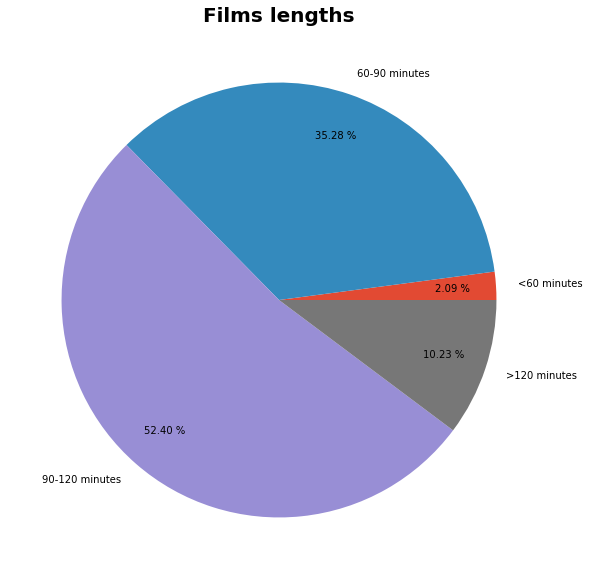

In [42]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')

labels = ['<60 minutes', '60-90 minutes', '90-120 minutes', '>120 minutes']
films_lenghts = [less_60, between_60_90, between_90_120, more_120]

plt.pie(films_lenghts, labels = labels, pctdistance=0.8,autopct='%.2f %%')

plt.title('Films lengths', fontdict={'fontweight':'bold', 'fontsize': 20})

plt.show()

## Line graph - Running time

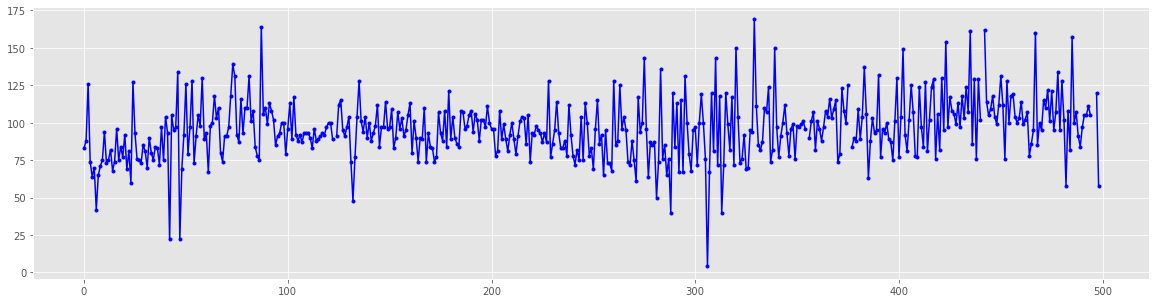

In [56]:
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Running time (mins)'], 'b.-', label='United States')
plt.show()

## Bar chart - IMDB

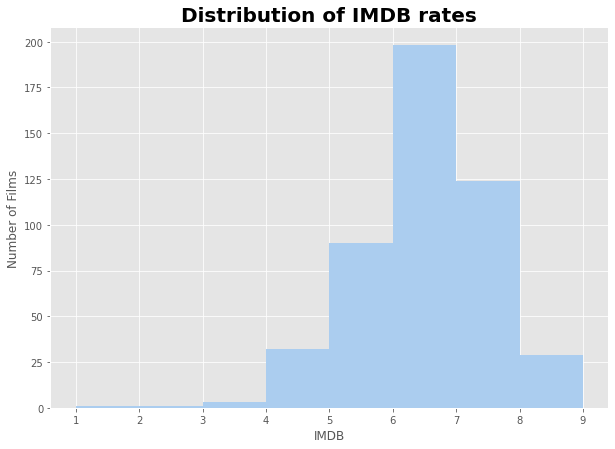

In [43]:
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(10,7))

plt.hist(df['IMDB'], bins=bins, color='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Films')
plt.xlabel('IMDB')
plt.title('Distribution of IMDB rates', fontdict={'fontweight':'bold', 'fontsize': 20})

plt.show()

## Scatter - Budget

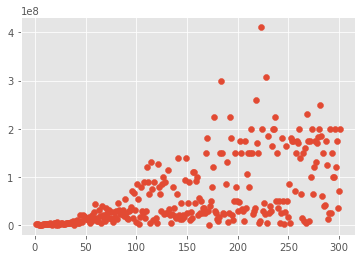

In [44]:
budget_data = df.loc[df['Budget $']>0]['Budget $']
indexes = [x for x in range(1, len(budget_data)+1)]
plt.scatter(indexes, budget_data)
plt.show()

## Box plot - Box office

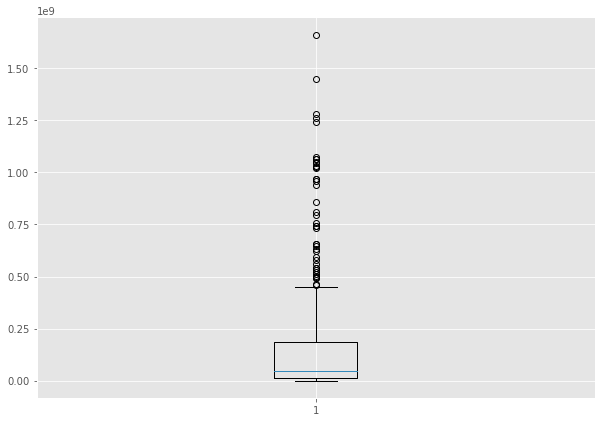

In [45]:
data = df.loc[df['Box office $'] > 0]['Box office $']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

## Pie chart - Box office

In [49]:
less_mln = df.loc[df['Box office $'] < 1000000].count()[0]
between_mln_quarter = df.loc[(df['Box office $'] > 1000000) & (df['Box office $'] < 250000000)].count()[0]
between_quarter_half = df.loc[(df['Box office $'] > 250000000) & (df['Box office $'] < 500000000)].count()[0]
between_half_bln = df.loc[(df['Box office $'] > 500000000) & (df['Box office $'] < 1000000000)].count()[0]
more_bln = df.loc[df['Box office $'] > 1000000000].count()[0]

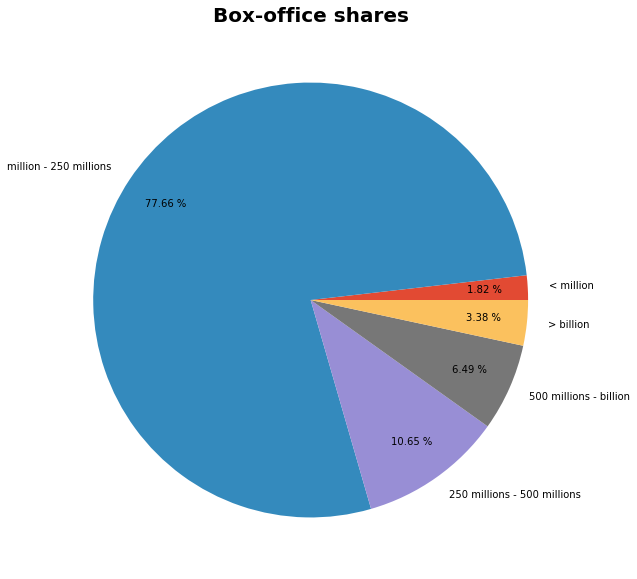

In [50]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')

labels = ['< million', 'million - 250 millions', '250 millions - 500 millions', '500 millions - billion', '> billion']
box_office_values = [less_mln, between_mln_quarter, between_quarter_half, between_half_bln, more_bln]

plt.pie(box_office_values, labels = labels, pctdistance=0.8,autopct='%.2f %%')

plt.title('Box-office shares', fontdict={'fontweight':'bold', 'fontsize': 20})

plt.show()

## Bar chart - Box-office

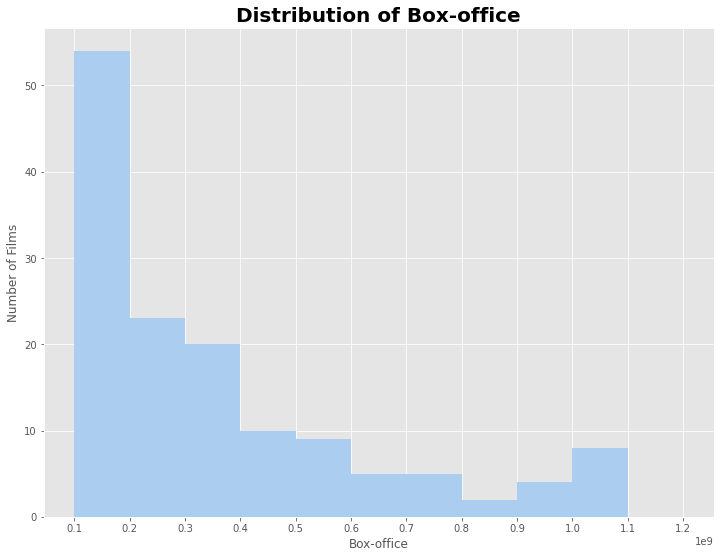

In [55]:
bins = [100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000, 800000000, 900000000, 1000000000, 1100000000, 1200000000]

plt.figure(figsize=(12,9))

plt.hist(df['Box office $'], bins=bins, color='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Films')
plt.xlabel('Box-office')
plt.title('Distribution of Box-office', fontdict={'fontweight':'bold', 'fontsize': 20})

plt.show()